# Рынок заведений общественного питания Москвы

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Партнёры просят нас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

Описание данных


Таблица rest_data:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.
## Загрузим данные и подготовим их к анализу
Загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработаем их.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import plotly.express as px 


rest_data=pd.read_csv('/datasets/rest_data.csv')
print('Общая информация')
print(rest_data.info())
print('Данные: ')
print('-------------------------------------------------')
print(rest_data.head())
print('-------------------------------------------------')
print(rest_data.describe())
print('Дубликаты')
print(rest_data.duplicated().sum())

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None
Данные: 
-------------------------------------------------
       id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Мо

Тип данных в порядке, дубликатов и пропусков нет, можно приступать к работе с данными. Но иожно привести названия заведений к нижнему регистру и сократить только до названий самих заведений

In [2]:
def  delete_lower(string):
    for i in range(len(string)):
        if string[i].isupper():
            return string[i: len(string)]
rest_data['object_name']=rest_data['object_name'].apply(delete_lower)
rest_data['object_name'].unique()



 #проверка наличия дубликатов, о которой говорю выше
rest_data.drop_duplicates(subset=['object_name', 'number','address'], keep='last')
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15314 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


## Анализ данных
### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.


In [3]:


grouped_data=rest_data['object_type'].value_counts().reset_index()
grouped_data


,index,object_type
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


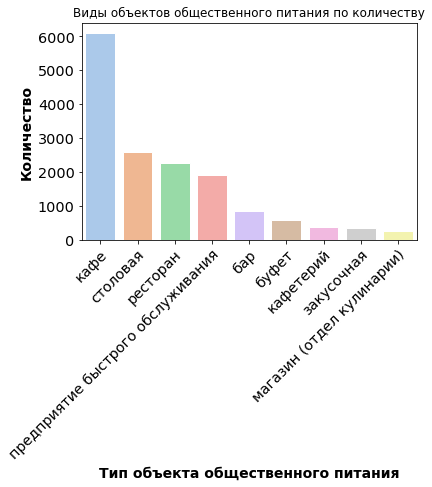

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='whitegrid')
sns.barplot(x ='index',y='object_type', data=grouped_data, palette = 'pastel')
plt.xticks(rotation=45, rotation_mode='anchor',ha='right')
plt.title('Виды объектов общественного питания по количеству')
ax.tick_params(labelsize='large')
ax.set_xlabel('Тип объекта общественного питания',fontsize=14,fontweight="bold")
ax.set_ylabel('Количество',fontsize=14,fontweight="bold")
plt.show()

По графику видно, что самым распространенным типом объекта общественного питания является кафе - их 6099, при чем разница между количеством кафе и остальными типами значительна. По популярности после кафе у нас идет столовая, но их всего 2587.Самые непопулярные - магазины с отделами кулинарии -273.

### Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

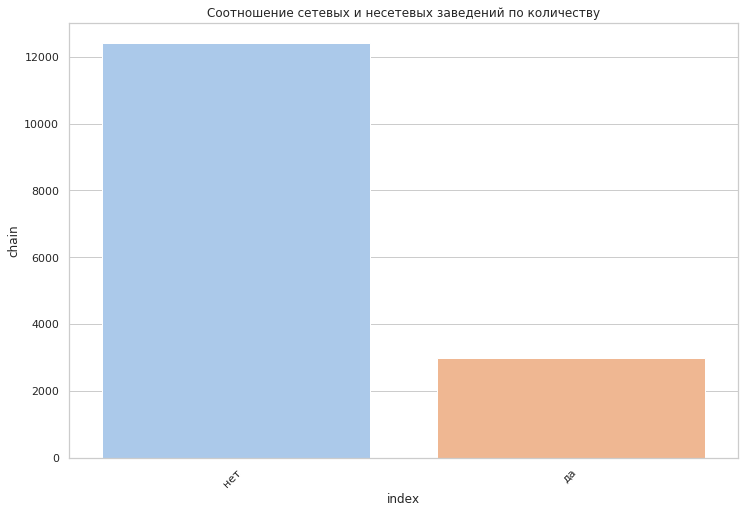

,index,chain
0,нет,12398
1,да,2968


In [5]:
chain_data=rest_data['chain'].value_counts().reset_index()

sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='whitegrid')
sns.barplot(x ='index',y='chain', data=chain_data, palette = 'pastel')
plt.xticks(rotation=45, rotation_mode='anchor',ha='right')
plt.title('Соотношение сетевых и несетевых заведений по количеству')
ax.tick_params(labelsize='large')
ax.set_xlabel('Сетевое или несетевое заведение',fontsize=14,fontweight="bold")
ax.set_ylabel('Количество',fontsize=14,fontweight="bold")
plt.show()

chain_data

Несетевый заведений в 4 раза больше, чем сетевых. Это логично, открыть и следить за исправной работой сети заведений достаточно сложно. Так же это весьма дорого. 

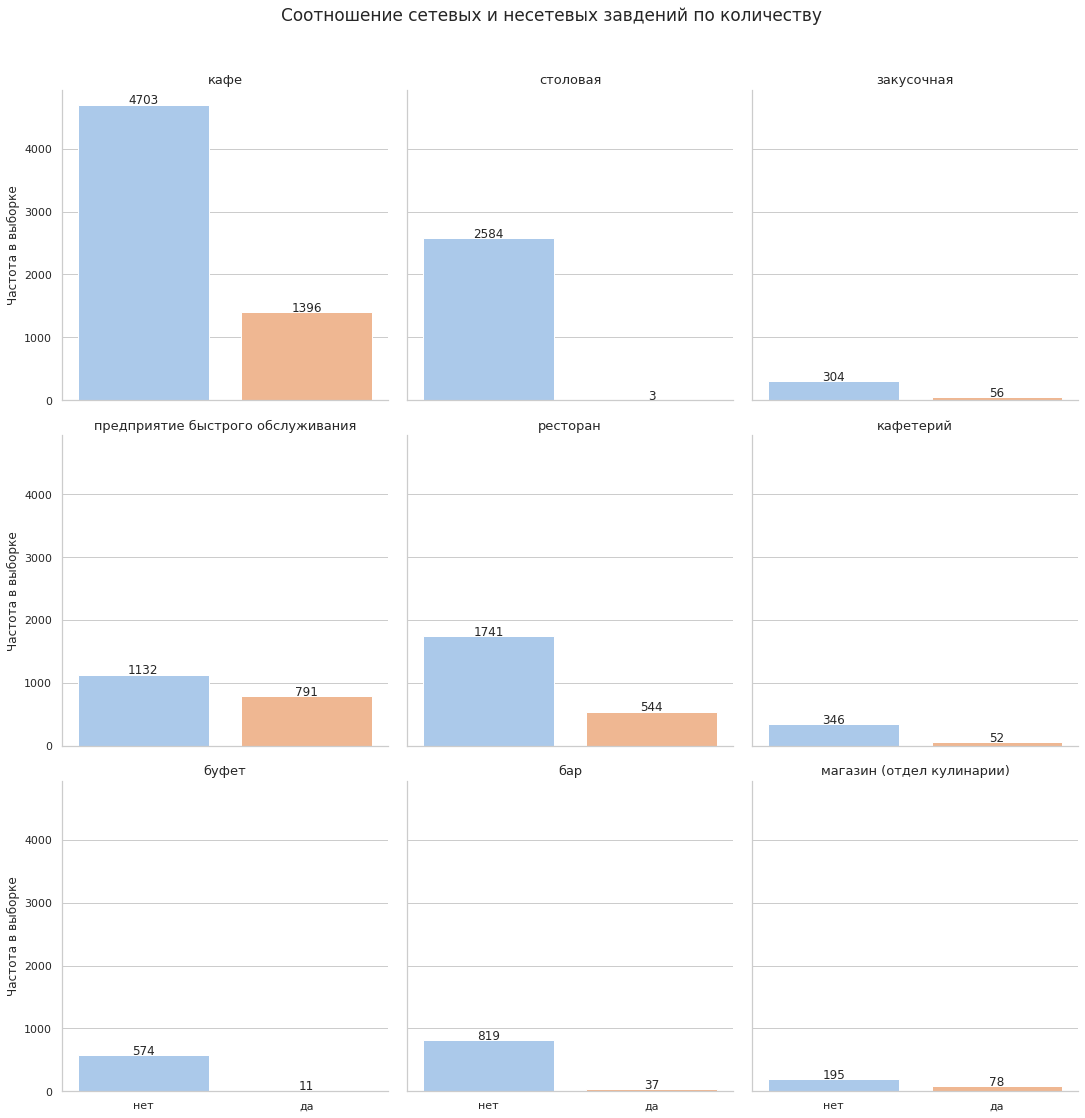

object_type
столовая                                3
буфет                                  11
бар                                    37
кафетерий                              52
закусочная                             56
магазин (отдел кулинарии)              78
ресторан                              544
предприятие быстрого обслуживания     791
кафе                                 1396
Name: object_name, dtype: int64

In [6]:
chain_rest = rest_data.query('chain == "да"')


every= sns.catplot(
    x="chain",
    col="object_type",
    col_wrap=3,
    kind="count",
    data=rest_data,
    aspect=1,
    palette='pastel'
)
every.set_axis_labels("","Частота в выборке")
every.fig.suptitle("Соотношение сетевых и несетевых завдений по количеству", y=1.05, fontsize=17)
every.set_titles("{col_name}",size=13)
for ax in (every.axes):
    for p in ax.patches:
        height=p.get_height()
        ax.text(
            x=p.get_x()+(p.get_width()/2),
            y=height+10,
            s="{:.0f}".format(height),
            ha="center"
        )
plt.show()
chain_rest.groupby('object_type')['object_name'].count().sort_values()

Примерно одинаковое количетсво сетевых и несетевых заведений типа "буфет" и "магазин(отдел кулинарии)". Во всех остальных разница более значительна. 






### Для какого вида объекта общественного питания характерно сетевое распространение?



object_type
бар                                  0.043224
буфет                                0.018803
закусочная                           0.155556
кафе                                 0.228890
кафетерий                            0.130653
магазин (отдел кулинарии)            0.285714
предприятие быстрого обслуживания    0.411336
ресторан                             0.238074
столовая                             0.001160
Name: chain, dtype: float64

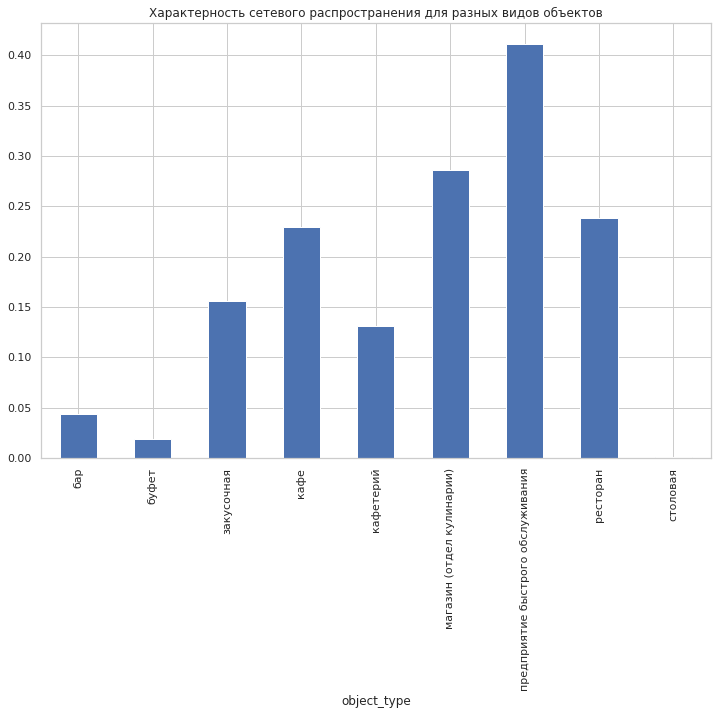

In [7]:
rest_data_yes=rest_data[rest_data['chain']=='да'].groupby('object_type')['chain'].count()
rest_data_no=rest_data.groupby('object_type')['chain'].count()
rest_data_chain=rest_data_yes/rest_data_no
rest_data_chain.plot(kind='bar')
plt.title('Характерность сетевого распространения для разных видов объектов')
rest_data_chain



### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

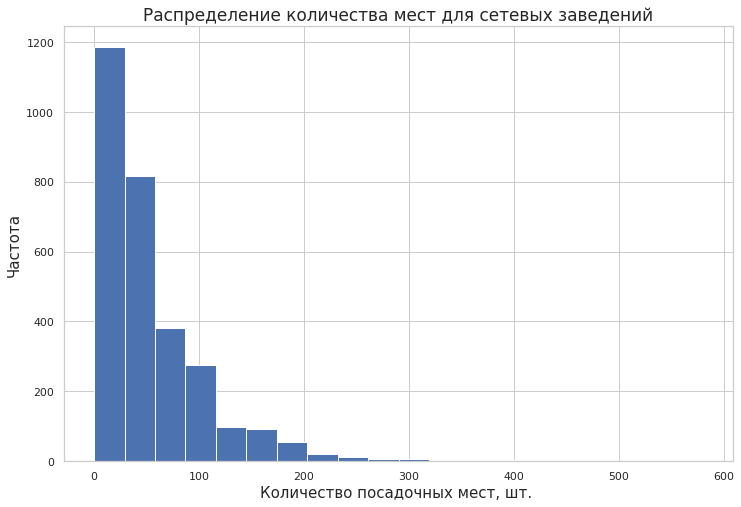

In [8]:
chain_rest['number'].hist(bins=20)
plt.title('Распределение количества мест для сетевых заведений', fontsize=17)
plt.xlabel('Количество посадочных мест, шт. ', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.show()


Распределение не похоже на нормальное, построим violinplot

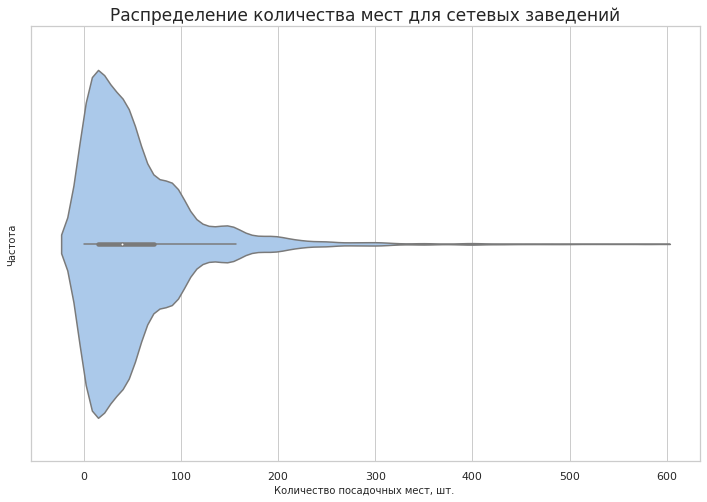

<Figure size 864x720 with 0 Axes>

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

In [9]:
sns.violinplot(x=chain_rest['number'],  palette='pastel') 

sns.set(style='whitegrid')
plt.title('Распределение количества мест для сетевых заведений',  fontsize=17)
plt.xlabel('Количество посадочных мест, шт. ', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.figure(figsize=(12,10))
plt.show()
chain_rest['number'].describe()


По графику можно понять, что наиболее популярны заведения с малым количеством мест, потому что их деражать намного проще. Сложно снять большую территорию под ресторан, сложно добиться полной заполняемости, а когда она есть сложно все успеть. Поэтому места с маленькой наполняемостью более популярны. 

### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим какой вид предоставляет в среднем самое большое количество посадочных мест. Построим графики.

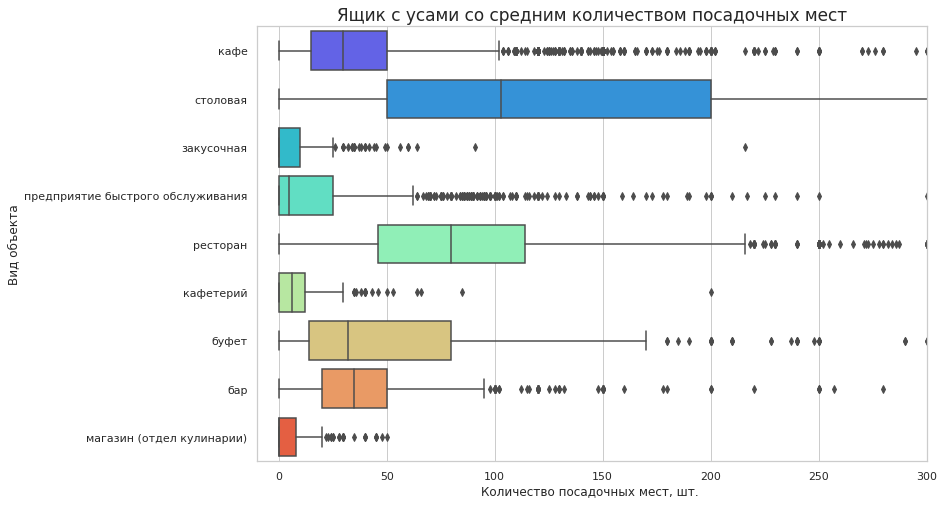

object_type
бар                                   43.494159
буфет                                 51.129915
закусочная                             7.608333
кафе                                  39.716019
кафетерий                              9.123116
магазин (отдел кулинарии)              5.589744
предприятие быстрого обслуживания     20.552262
ресторан                              96.834136
столовая                             130.246618
Name: number, dtype: float64

In [10]:
ax = sns.boxplot(x='number', y='object_type', data=rest_data, palette="rainbow")
ax.set_xlim(-10,300)
sns.set(rc={'figure.figsize':(14,6)})
plt.title('Ящик с усами со средним количеством посадочных мест',  fontsize=17)
plt.xlabel('Количество посадочных мест, шт. ', fontsize=12)
plt.ylabel('Вид объекта', fontsize=12)

plt.show()
rest_data.groupby('object_type')['number'].mean()

У столовых больше всего в среднем посадочных мест, при чем по графику видно, что это число полученно не за счет выбрасов, значит эта информация очень даже похожа на правду. Это и логично, столовые изначально рассчитаны на большое количество людей. Дальше идут рестораны, но там достаточно много выбросов, ведь рестораны бываются разного уровня, в разных местах и т.д. Меньше всего наполняемость в магазинах, что верно, вель там вообще практически нет посадочных мест


### Выделим в отдельный столбец информацию об улице из столбца address .


In [11]:
rest_data['address']

0               город Москва, улица Егора Абакумова, дом 9
1        город Москва, улица Талалихина, дом 2/1, корпус 1
2                город Москва, Абельмановская улица, дом 6
3                  город Москва, Абрамцевская улица, дом 1
4        город Москва, Абрамцевская улица, дом 9, корпус 1
                               ...                        
15361         город Москва, 3-й Крутицкий переулок, дом 18
15362             город Москва, улица Земляной Вал, дом 33
15363             город Москва, улица Земляной Вал, дом 33
15364    город Москва, поселение Московский, Киевское ш...
15365               город Москва, Ходынский бульвар, дом 4
Name: address, Length: 15366, dtype: object

In [12]:
rest_data['street'] = rest_data['address'].apply(lambda x: x.split(', ')[1])
rest_data['street'] 

0         улица Егора Абакумова
1              улица Талалихина
2          Абельмановская улица
3            Абрамцевская улица
4            Абрамцевская улица
                  ...          
15361    3-й Крутицкий переулок
15362        улица Земляной Вал
15363        улица Земляной Вал
15364      поселение Московский
15365         Ходынский бульвар
Name: street, Length: 15366, dtype: object

### Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?


In [13]:
from io import BytesIO
import requests

spreadsheet_id = '1_mjHslTM_63nBcPq3lQ8MFiAYEeJYZgrYi4zhBfX18c'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df=df.rename(columns={'streetname':'street'})
df

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [14]:
street_data_merged=pd.merge(rest_data, df, on='street')
street_data_merged

,id,object_name,chain,object_type,address,number,street,areaid,okrug,area
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86,СВАО,Ярославский Район
1,193477,Grill-House,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,86,СВАО,Ярославский Район
2,196756,Пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,86,СВАО,Ярославский Район
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18,ЦАО,Таганский район
4,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117,ЮВАО,Нижегородский район
...,...,...,...,...,...,...,...,...,...,...
29583,213369,Великолепный век,нет,ресторан,"город Москва, улица Кожевнический Вражек, дом 3А",38,улица Кожевнический Вражек,98,ЮАО,Даниловский район
29584,206426,Чайхана «Мантыбар»,нет,ресторан,"город Москва, улица Кожевнический Вражек, дом 3А",30,улица Кожевнический Вражек,98,ЮАО,Даниловский район
29585,214324,Кадаши ( закрытый),нет,ресторан,"город Москва, 2-й Кадашёвский переулок, дом 16...",15,2-й Кадашёвский переулок,21,ЦАО,Район Якиманка
29586,213851,Ресторан «АТМОСФЕРА»,нет,ресторан,"город Москва, улица Василисы Кожиной, дом 1, к...",49,улица Василисы Кожиной,48,ЗАО,Район Филевский Парк


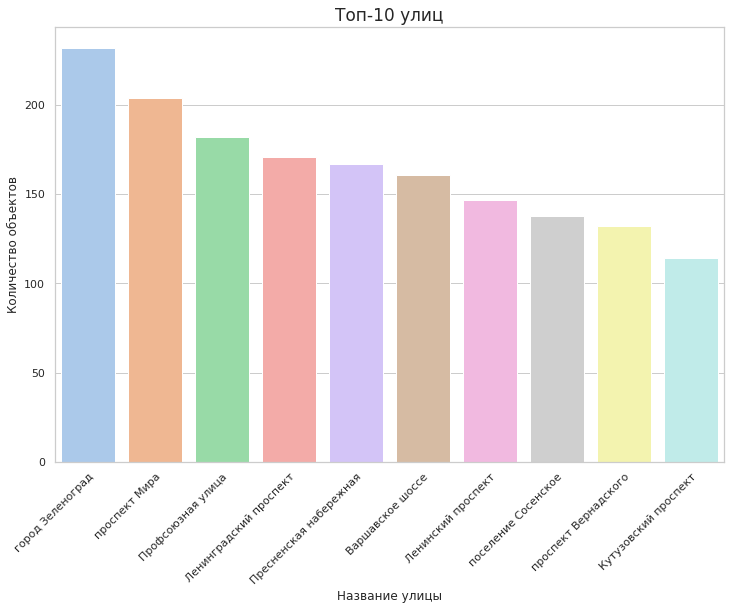

,index,street
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,138
8,проспект Вернадского,132
9,Кутузовский проспект,114


In [15]:
street_data=rest_data['street'].value_counts().reset_index()
top_10 = street_data.sort_values(by='street',ascending=False).head(10)
list_of_10=top_10['index']
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='whitegrid')
sns.barplot(x ='index',y='street', data=top_10, palette = 'pastel')
plt.xticks(rotation=45, rotation_mode='anchor',ha='right')
plt.title('Топ-10 улиц',  fontsize=17)
plt.xlabel('Название улицы', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.show()
top_10

Удалим город Зеленоград и поселение Сосенское из этого топа


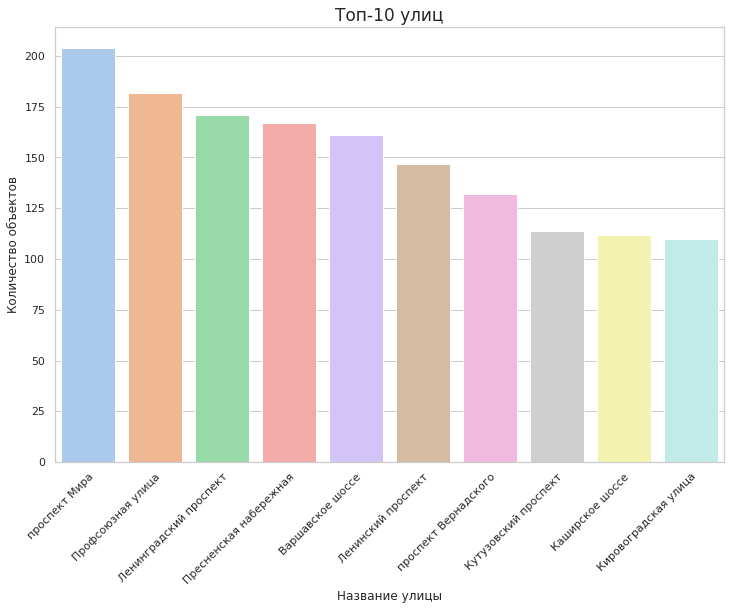

,index,street
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
8,проспект Вернадского,132
9,Кутузовский проспект,114
10,Каширское шоссе,112
11,Кировоградская улица,110


In [16]:
street_data=street_data.query('index !="город Зеленоград"')
street_data=street_data.query('index !="поселение Сосенское"')
top_10 = street_data.sort_values(by='street',ascending=False).head(10)
list_of_10=top_10['index']
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='whitegrid')
sns.barplot(x ='index',y='street', data=top_10, palette = 'pastel')
plt.xticks(rotation=45, rotation_mode='anchor',ha='right')
plt.title('Топ-10 улиц',  fontsize=17)
plt.xlabel('Название улицы', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.show()
top_10

In [17]:
top_10=top_10.rename(columns={'index':'street','street':'num'})
top_10

,street,num
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
8,проспект Вернадского,132
9,Кутузовский проспект,114
10,Каширское шоссе,112
11,Кировоградская улица,110


In [18]:
top_10_merged=pd.merge(top_10,street_data_merged, on='street',how='left')
top_10_merged

,street,num,id,object_name,chain,object_type,address,number,areaid,okrug,area
0,проспект Мира,204,149899,Сухарева Башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10,70,СВАО,Алексеевский район
1,проспект Мира,204,149899,Сухарева Башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10,86,СВАО,Ярославский Район
2,проспект Мира,204,149899,Сухарева Башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10,78,СВАО,Район Марьина роща
3,проспект Мира,204,149899,Сухарева Башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10,79,СВАО,Останкинский район
4,проспект Мира,204,149899,Сухарева Башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10,81,СВАО,Район Ростокино
...,...,...,...,...,...,...,...,...,...,...,...
7496,Кировоградская улица,110,214146,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0,108,ЮАО,Район Чертаново Северное
7497,Кировоградская улица,110,214146,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0,110,ЮАО,Район Чертаново Южное
7498,Кировоградская улица,110,211232,Предприятие быстрого обслуживания «Милти»,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 14",0,109,ЮАО,Район Чертаново Центральное
7499,Кировоградская улица,110,211232,Предприятие быстрого обслуживания «Милти»,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 14",0,108,ЮАО,Район Чертаново Северное


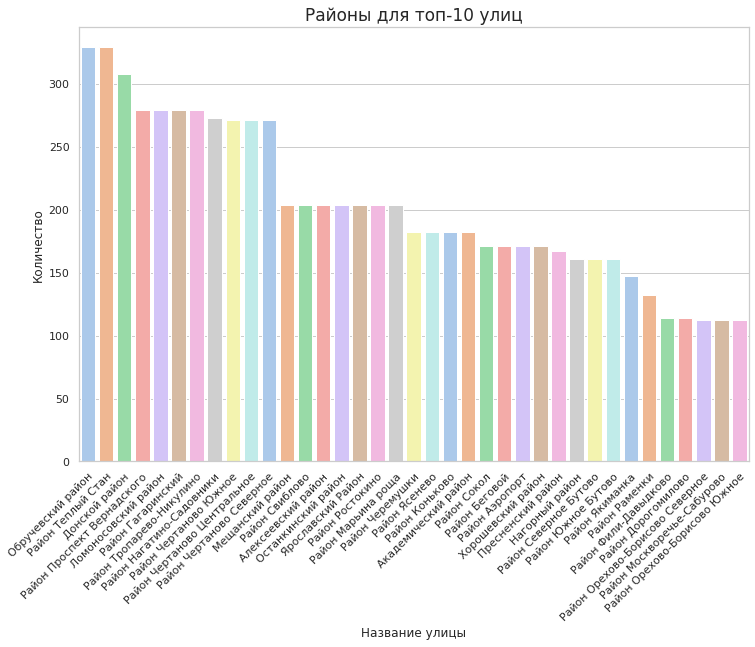

,street,area
0,проспект Мира,Алексеевский район
1,проспект Мира,Ярославский Район
2,проспект Мира,Район Марьина роща
3,проспект Мира,Останкинский район
4,проспект Мира,Район Ростокино
...,...,...
7496,Кировоградская улица,Район Чертаново Северное
7497,Кировоградская улица,Район Чертаново Южное
7498,Кировоградская улица,Район Чертаново Центральное
7499,Кировоградская улица,Район Чертаново Северное


In [19]:
street_data_10_m=top_10_merged['area'].value_counts().reset_index()

sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='whitegrid')
sns.barplot(x ='index',y='area', data=street_data_10_m, palette = 'pastel')
plt.xticks(rotation=45, rotation_mode='anchor',ha='right')
plt.title('Районы для топ-10 улиц',  fontsize=17)
plt.xlabel('Название улицы', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

top_10_merged[['street','area']]

Наверное тут стоитло убрать город Зеленоград, но раз там так много объектов, то не брать его во внимание нельзя. Далее идет проспект Мира, Профсоюзная улица и тд. По графику видно, что распределение идет +- равномерно. Скорее больше всего заведений в центре Москвы.
* проспект Мира - Мещанский район, недалеко от ВДНХ
* Профсоюзная улица - Академический район, юг москвы, между метро Калужская и Беляво
* Ленинградский проспект - р-н аэропрта, около метро аэропорт и Петровский парк
* Пренсенская набережная - р-н Филевский парк, около Москвы реки и метро Международная и Выставочная
* Варшавское шоссе - р-н Чертаново и этим все сказано
* Ленинский проспект - р-н Якиманка
* проспект Вернадского - Гагаринский р-н, недалеко от МГУ
* Кутузовскй проспект - р-н Долгомиров, метро парк победы

Можно заметить, что очень много мест общественного питания находится не в центре, а в жилых районах, недалеко от метро. Скорее всего это связано с тем, что в цетре снимать помещения сложнее, да и дороже, там проще делать заведения для более обеспеченного сегмента общества. А в жилых районах всегда будет спрос и большое количество покупателей. 

### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?



In [20]:
street=rest_data['street'].value_counts().reset_index()
street_one=street[street['street']==1].reset_index()

print(street_one)



     level_0                      index  street
0       1321      2-й Стрелецкий проезд       1
1       1322  1-й Голутвинский переулок       1
2       1323           Кунцевская улица       1
3       1324     Бескудниковский проезд       1
4       1325       Автомобильный проезд       1
..       ...                        ...     ...
574     1895        Несвижский переулок       1
575     1896             улица Рудневой       1
576     1897                     дом 23       1
577     1898          Спортивный проезд       1
578     1899          площадь Журавлёва       1

[579 rows x 3 columns]


In [21]:
street_one=street_one.rename(columns={'index':'street','street':'num'})
street_1=pd.merge(street_one,street_data_merged, on='street',how='left')
street_1

,level_0,street,num,id,object_name,chain,object_type,address,number,areaid,okrug,area
0,1321,2-й Стрелецкий проезд,1,22203.0,ВУДЕН БОР,нет,кафе,"город Москва, 2-й Стрелецкий проезд, дом 7",40.0,78.0,СВАО,Район Марьина роща
1,1322,1-й Голутвинский переулок,1,146400.0,Шелби,нет,кафе,"город Москва, 1-й Голутвинский переулок, дом 6",22.0,21.0,ЦАО,Район Якиманка
2,1323,Кунцевская улица,1,79562.0,Фидан,нет,ресторан,"город Москва, Кунцевская улица, дом 10",81.0,40.0,ЗАО,Район Кунцево
3,1324,Бескудниковский проезд,1,29490.0,СТОЛ.ШКОЛЫ 1592 КШП «ЛОГАРИФМ»,нет,столовая,"город Москва, Бескудниковский проезд, дом 4А",240.0,56.0,САО,Бескудниковский Район
4,1325,Автомобильный проезд,1,28077.0,Столовая,нет,столовая,"город Москва, Автомобильный проезд, дом 6, стр...",48.0,117.0,ЮВАО,Нижегородский район
...,...,...,...,...,...,...,...,...,...,...,...,...
617,1896,улица Рудневой,1,28697.0,СТОЛОВАЯ (ГБОУ «Школа №281»),нет,буфет,"город Москва, улица Рудневой, дом 10",60.0,72.0,СВАО,Бабушкинский район
618,1897,дом 23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,1898,Спортивный проезд,1,28884.0,None,нет,буфет,"город Москва, Спортивный проезд, дом 3А",190.0,115.0,ЮВАО,Район Люблино
620,1899,площадь Журавлёва,1,160305.0,Арт Кафе «New Place Moscow»,нет,кафе,"город Москва, площадь Журавлёва, дом 2, строен...",120.0,34.0,ВАО,Район Преображенское


                         index  area
0              Таганский район    27
1              Район Хамовники    26
2              Басманный район    25
3               Тверской район    20
4            Пресненский район    19
..                         ...   ...
94   Район Очаково-Матвеевское     1
95        Район Филевский Парк     1
96          Район Левобережный     1
97       Район Чертаново Южное     1
98  Район Москворечье-Сабурово     1

[99 rows x 2 columns]


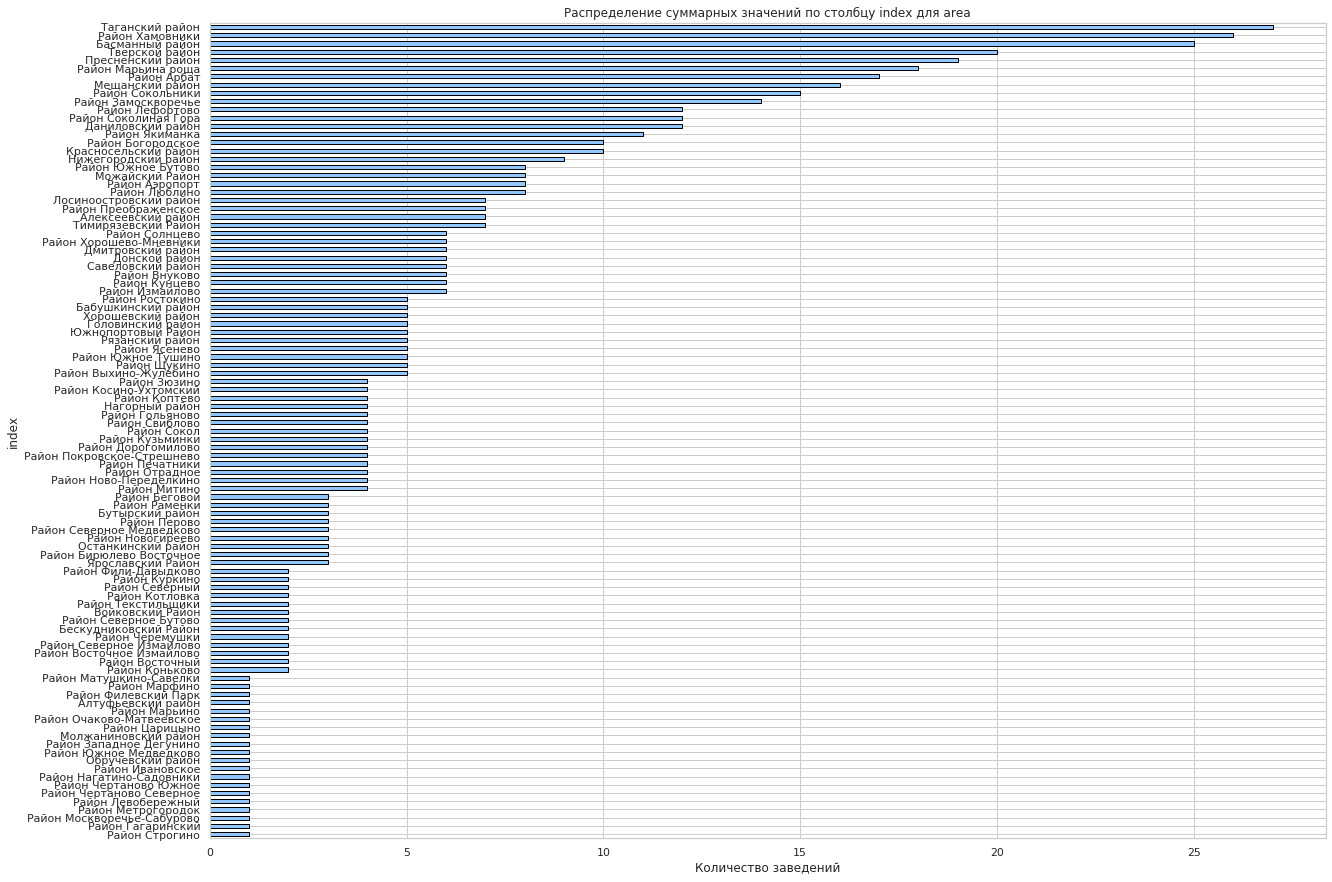

In [22]:
def my_bar(data,column, y):
    plt.style.use('seaborn-pastel')
    grouped_data = data.groupby(column)[y]
    grouped_data_calculated = grouped_data.sum().sort_values()
    figsize = (20,15)
    plot = grouped_data_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black')
    plt.title('Распределение суммарных значений по столбцу '+column+' для '+ y)
    
street_1_=street_1['area'].value_counts().reset_index()
print(street_1_)
my_bar(street_1_, 'index','area')
plt.xlabel('Количество заведений')
plt.show()

Видно, что в Таганском районе, Хамовниках и в Басманском районе больше всего улиц с 1 заведением. 
  
Я бы хотела научиться строить красивую визуализацию, где можно было бы подгрузить координаты по адресу и занести их на карту, но в курсе это нам не объяснялось, а в интернете я дельного ничего не нашла. Наверняка есть какие-то статьи или полезные ссылки, было бы вообще супер, если бы ты смог показать на примере. Там нужно как-то подвязать координаты, это наверное не так просто, как в предыдущем пункте, через таблицу. Так или иначе, я не разобралась как это сделать, помоги пожалуйста!


Тут я не поняла как посмотреть районы, видела, что другие подгружали как-то через ссылки еще файлы с районами москвы, но я что-то запуталась и побороть это не смогла((
буду благодарна подсказке)
### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Изучим какие закономерности можно выявить.

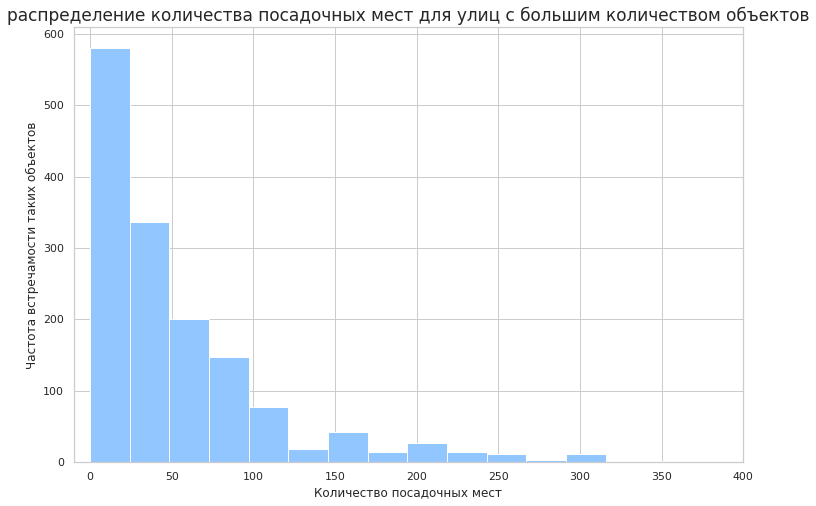

In [23]:
temp = rest_data[rest_data['street'].isin(list_of_10)]

temp['number'].hist(bins=70)
plt.title('распределение количества посадочных мест для улиц с большим количеством объектов',  fontsize=17)
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.ylabel('Частота встречамости таких объектов', fontsize=12)
plt.xlim(-10,400)
plt.show()



Распределение не нормальное, построим viloinplot. 

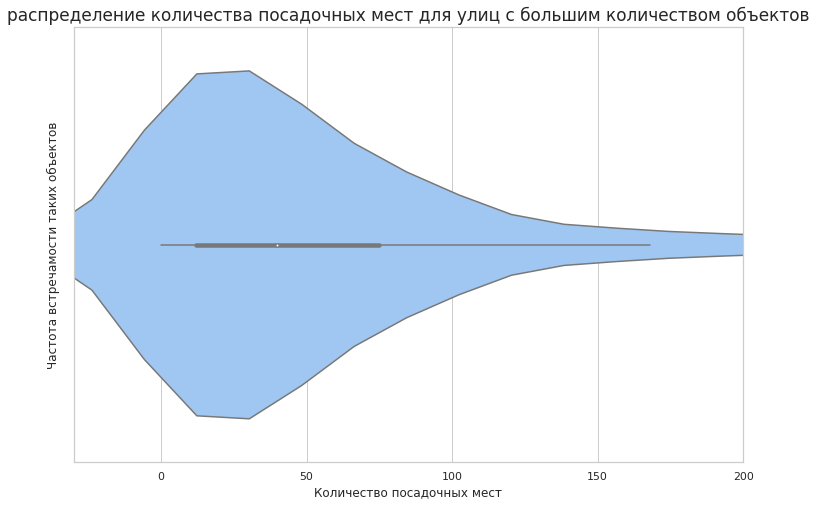

In [24]:
ax = sns.violinplot(x=temp['number'])
plt.title('распределение количества посадочных мест для улиц с большим количеством объектов',  fontsize=17)
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.ylabel('Частота встречамости таких объектов', fontsize=12)
ax.set_xlim(-30,200)
plt.show()

Видно, что в среднем заведения имеют около 40 посадочных мест, диопазон количества мест у большинства заведений от 10 до 75. 

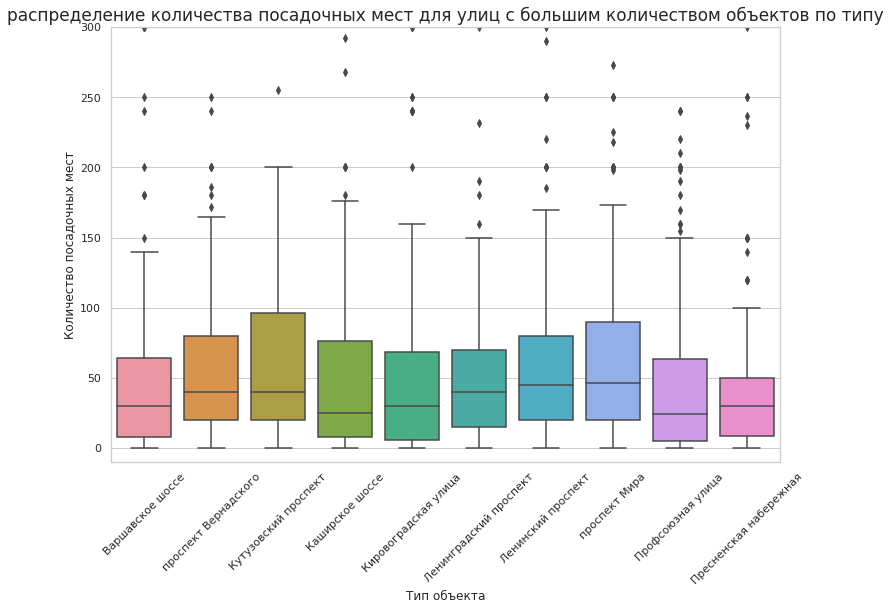

In [25]:
ax = sns.boxplot(x="street", y="number", data=temp, orient='v')
plt.title('распределение количества посадочных мест для улиц с большим количеством объектов по типу',  fontsize=17)
plt.xlabel('Тип объекта', fontsize=12)
plt.ylabel('Количество посадочных мест', fontsize=12)
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
plt.show()

Самое большое количество мест имеют заведения на Кутузовском проспекте, на проспекте Мира и Ленинском проспекте. Меньше всего на Профсоюзной улице. 

## Презентация

Ссылка на презентацию: https://drive.google.com/file/d/1aaxWS0bRuCKDydINXCgDmSuzg6ejWf1r/view?usp=sharing

## Вывод

Несетевых заведений больше, чем сетевых в 4 раза, самым популярным типом объекта общественного питания является кафе. Среднее количество посадочных мест там около 40, с таким количеством посадочных мест больше всего заведений встречается на проспекте Вернадского, Кутузовском, Ленинградском и Ленинском проспекте, а так же проспекте Мира. Можно открыть заведение такого типа, потому что если  такое большое кол-во заведений такого типа по сей день существуют, значит они приносят прибыль и окупаются.
Не стоит открывать заведение, где будет очень мало или очень много посадочных мест, так же не стоит открывать в центре или на небольших улицах, где уже существует множество кафе и ресторанов - слишком большая конкуренция.


Лучше всего открыть кафе на 30-40 мест, недалеко от центра москвы между садовым кольцом и ТТК, лучше открыть кафе на улице, которой нет в нашем списке, то есть где нет конкурентов, но в районах скопления большого количества людей(тц, офисные центры) в таких районах как Таганский, Хамовники и Басманный. Для более четких рекомендаций требуется провести более четкий анализ, узнать выручку кафе, окупаемость и тд. Далее можно масштабировать бизнес и открыть еще несколько заведений, создав сеть. 
